In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [243]:
#Display Settings
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [244]:
#load dataset
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Understanding

In [245]:
df.shape


(8807, 12)

In [246]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,46249,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [247]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [249]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Cleaning

In [250]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [251]:
cols_unknown=['director','country','cast']
#taking a list of all columns with null values we can take single column at a time and use fillna method individually also.


In [252]:
df[cols_unknown]=df[cols_unknown].fillna('Unknown').astype(str)

In [253]:
df[['director','country','cast']].isna().sum()
# it confirms all the null values are being replaced with unknown as they are crucial for analysis

director    0
country     0
cast        0
dtype: int64

In [254]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [255]:
# we gonna drop the remmmaing values in date_added which is 98 because its approx 1.1% of total data in date_added and Imputing values would introduce artificial or misleading data.
df=df.dropna(subset='date_added')

In [256]:
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
#we used mode to basically select the first most frequent value and fill the null values in the rating column


In [257]:
df=df.dropna(subset='duration')

In [258]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [259]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 8706 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8706 non-null   object        
 1   type          8706 non-null   object        
 2   title         8706 non-null   object        
 3   director      8706 non-null   object        
 4   cast          8706 non-null   object        
 5   country       8706 non-null   object        
 6   date_added    8706 non-null   datetime64[ns]
 7   release_year  8706 non-null   int64         
 8   rating        8706 non-null   object        
 9   duration      8706 non-null   object        
 10  listed_in     8706 non-null   object        
 11  description   8706 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 884.2+ KB


(8706, 12)

# Feature Engineering

In [260]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
# create some new insights

In [261]:
df.head(10)
# to verify the new columns are created or not

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9


In [262]:
df['content_age']=df['year_added']-df['release_year']
df[['release_year','year_added','content_age']]

,release_year,year_added,content_age
0,2020,2021,1
1,2021,2021,0
2,2021,2021,0
3,2021,2021,0
4,2021,2021,0
...,...,...,...
8802,2007,2019,12
8803,2018,2019,1
8804,2009,2019,10
8805,2006,2020,14


In [263]:
df['content_age'].describe()

count    8706.000000
mean        4.691707
std         8.793479
min        -3.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
Name: content_age, dtype: float64

In [264]:
(df['content_age']<0).sum()

np.int64(14)

In [265]:
df.loc[df['content_age']<0,'content_age']=0
(df['content_age']<0).sum()


np.int64(0)

In [266]:
df['content_age'].describe()
# as we can see that the values are now positive and median =1 that means half of the content has been added within 1 year

count    8706.000000
mean        4.693660
std         8.792274
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
Name: content_age, dtype: float64

In [267]:
df['not_recent']=0
df.loc[df['content_age']>5,'not_recent']=1
# created a column not_recent

In [268]:
df['legacy_content']=0
df.loc[df['content_age']>10,'legacy_content']=1
#

- I used a 5-year threshold to analyze recency, since streaming platforms prioritize fresh content, and a 10-year threshold to identify legacy titles and long-term catalog depth.

In [269]:
df['recent_content']=0
df.loc[df['content_age']<=2,'recent_content']=1
#I defined recent content as titles added within the last two years to reflect Netflix’s focus on fresh releases, while also analyzing older and legacy content to understand catalog depth.

- Calculating the percentage of all 3 categories of content

In [270]:
legacy_per=df['legacy_content'].value_counts(normalize=True)[1]*100
not_recent_per=df['not_recent'].value_counts(normalize=True)[1]*100
recent_per=df['recent_content'].value_counts(normalize=True)[1]*100

In [271]:
pd.DataFrame({
    'Category':['Recent (<=2 years)','Not Recent (>5 Years)','Legacy Recent (>10 Years)'],
    'Percentage':[
        f"{recent_per:.2f}%",
        f"{not_recent_per:.2f}%",
        f"{legacy_per:.2f}%"
    ]
})

,Category,Percentage
0,Recent (<=2 years),63.17%
1,Not Recent (>5 Years),24.17%
2,Legacy Recent (>10 Years),13.76%


- Around 63.17% of Netflix’s catalog is recent (≤2 years), while only 13.76% consists of legacy titles (>10 years), highlighting a strong focus on fresh content with a limited reliance on long-term archival titles.

In [272]:
df['month_added'].value_counts().sort_index()
#Netflix tends to add more content in specific months, possibly aligned with release cycles.


month_added
1     727
2     557
3     734
4     758
5     626
6     724
7     819
8     748
9     764
10    755
11    697
12    797
Name: count, dtype: int64

In [273]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'content_age', 'not_recent',
       'legacy_content', 'recent_content'],
      dtype='object')

In [274]:
df['listed_in'].str.split(', ').explode().value_counts().head(5)

listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1328
Documentaries              869
Name: count, dtype: int64

- Dramas and international content dominate Netflix’s catalog

In [275]:
df['ismovie']=(df['type']=='Movie').astype(int)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,content_age,not_recent,legacy_content,recent_content,ismovie
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,1,0,0,1,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,0,0,0,1,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,0,0,0,1,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,0,0,0,1,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,0,0,0,1,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,0,0,0,1,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,0,0,0,1,1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,28,1,1,0,1
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,0,0,0,1,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,0,0,0,1,1


In [276]:
# initialize columns
df['duration_minutes'] = 0
df['num_seasons'] = 0

In [277]:
df.loc[df['type'] == 'Movie', 'duration_minutes'] = (
    df.loc[df['type'] == 'Movie', 'duration']
      .str.replace(' min', '', regex=False)
      .astype(int)
)


In [278]:
df.loc[df['type'] == 'TV Show', 'num_seasons'] = (
    df.loc[df['type'] == 'TV Show', 'duration']
      .str.replace(' Seasons', '', regex=False)
      .str.replace(' Season', '', regex=False)
      .astype(int)
)


In [279]:
df.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,content_age,not_recent,legacy_content,recent_content,ismovie,duration_minutes,num_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,1,0,0,1,1,90,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,0,0,0,1,0,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,0,0,0,1,0,0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,0,0,0,1,0,0,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,0,0,0,1,0,0,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,0,0,0,1,0,0,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,0,0,0,1,1,91,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,28,1,1,0,1,125,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,0,0,0,1,0,0,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,0,0,0,1,1,104,0


In [280]:
df[['duration_minutes', 'num_seasons']].describe()


,duration_minutes,num_seasons
count,8706.000000,8706.000000
mean,70.090627,0.500000
std,51.286444,1.116865
min,0.000000,0.000000
25%,0.000000,0.000000
50%,89.000000,0.000000
75%,106.000000,1.000000
max,312.000000,17.000000


# EDA (Exploratory Data Analysis)

In [281]:
#How much content is Netflix adding?
df['type'].value_counts()

type
Movie      6128
TV Show    2578
Name: count, dtype: int64

In [282]:
#How has Netflix grown over time?
df.groupby('year_added').size().sort_index()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      10
2014      23
2015      73
2016     416
2017    1163
2018    1625
2019    1999
2020    1878
2021    1498
dtype: int64

In [283]:
#Is Netflix focusing more on TV shows or movies recently?
df.groupby(['year_added','type']).size().unstack(fill_value=0)

type,Movie,TV Show
year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,4
2014,19,4
2015,56,17
2016,251,165


In [284]:
#How old is content when added?
df['content_age'].describe()


count    8706.000000
mean        4.693660
std         8.792274
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
Name: content_age, dtype: float64

In [285]:
df.groupby('type')['content_age'].median()


type
Movie      2.0
TV Show    0.0
Name: content_age, dtype: float64

In [286]:
#What’s the typical movie length?
df[df['ismovie'] == 1]['duration_minutes'].describe()
#75% of movies have a runtime of 114 minutes or less


count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_minutes, dtype: float64

In [287]:
#How many seasons do TV shows usually have?
df[df['ismovie'] == 0]['num_seasons'].value_counts().head(100)


num_seasons
1     1791
2      384
3      178
4       89
5       55
6       30
7       18
8       13
9        8
10       5
13       2
15       2
12       2
17       1
Name: count, dtype: int64

In [288]:
df[df['ismovie'] == 0]['num_seasons'].describe()
#75% of TV shows have 2 seasons or fewer

count    2578.000000
mean        1.688518
std         1.485263
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: num_seasons, dtype: float64

In [289]:
#Which countries contribute the most content?
df['country'].value_counts().head()

country
United States     2775
India              971
Unknown            827
United Kingdom     403
Japan              241
Name: count, dtype: int64

## Key Insights:

- Netflix prefers newer content (median content age ≈ 1 year)

- TV shows are usually short-running (≤ 2 seasons for 75%)

- Movies are generally short to moderate in length

- Netflix’s content library has grown over time

- There is a shift toward TV shows compared to earlier years

In [290]:
df=df.rename(columns={'ismovie':'is_movie'})

In [291]:
df['type'].value_counts()

type
Movie      6128
TV Show    2578
Name: count, dtype: int64

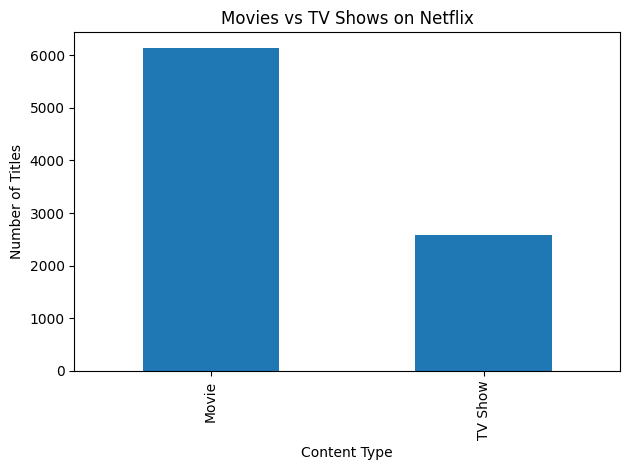

In [292]:
df['type'].value_counts().plot(kind='bar')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()



- Insight: Netflix’s catalog is movie-heavy, though TV shows form a substantial share.

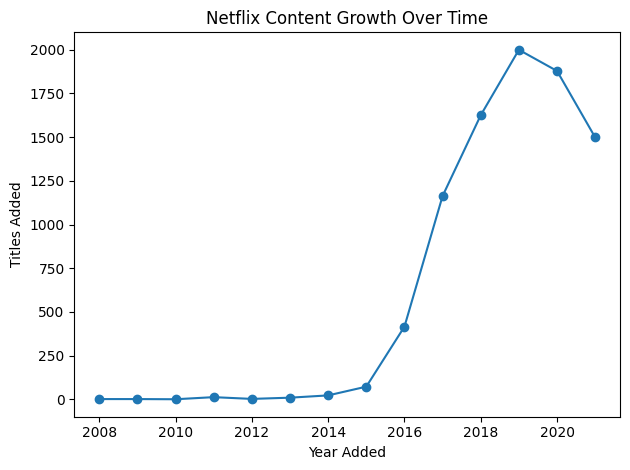

In [293]:
df.groupby('year_added').size().plot(kind='line', marker='o')
plt.title('Netflix Content Growth Over Time')
plt.xlabel('Year Added')
plt.ylabel('Titles Added')
plt.tight_layout()
plt.show()


- Insight: Rapid acceleration after 2016, peaking around 2019–2020.

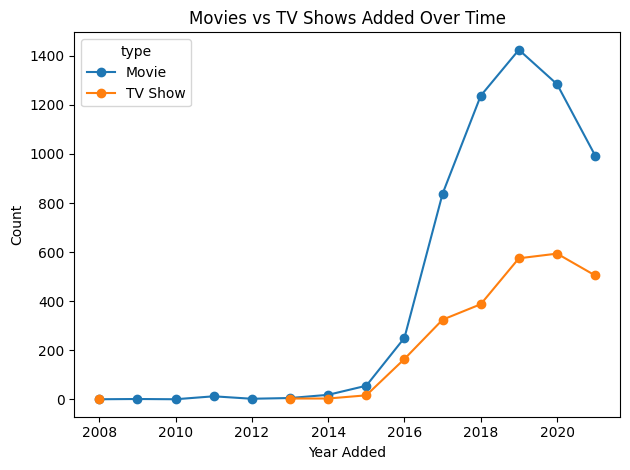

In [294]:
df.groupby(['year_added','type']).size().unstack().plot(kind='line', marker='o')
plt.title('Movies vs TV Shows Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


- Insight: TV shows have increased steadily, signaling a strategic shift alongside movies.

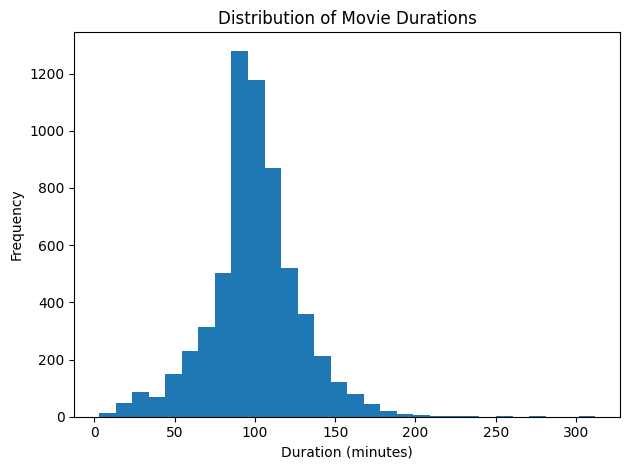

In [295]:
df[df['is_movie'] == 1]['duration_minutes'].plot(kind='hist', bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Insight: Most movies cluster between ~80–120 minutes (moderate length).

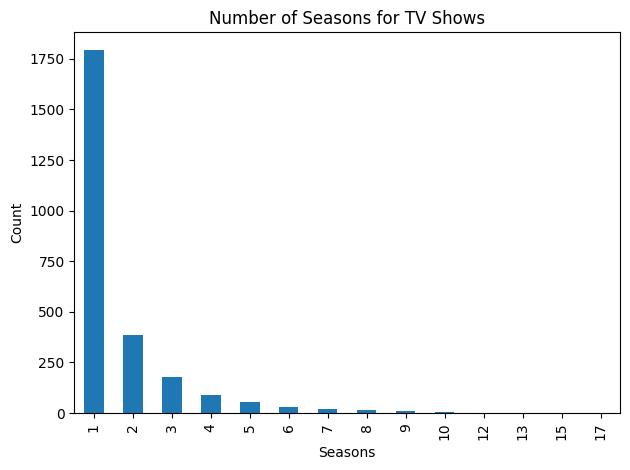

In [296]:
df[df['is_movie'] == 0]['num_seasons'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Seasons for TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


- Insight: The majority of shows run for 1–2 seasons; long-running series are rare.

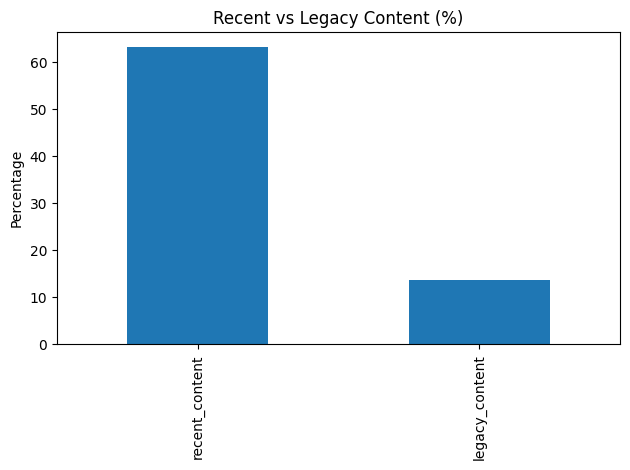

In [297]:
(df[['recent_content','legacy_content']]
 .mean()
 .mul(100)
 .plot(kind='bar'))

plt.title('Recent vs Legacy Content (%)')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


- Insight: A much larger share is recent; legacy titles form a smaller portion.

In [298]:
import numpy as np

In [299]:
df['content_age_type'] = np.select(
    [
        df['legacy_content'] == 1,
        df['not_recent'] == 1,
        df['recent_content'] == 1
    ],
    ['Legacy', 'Not Recent', 'Recent'],
    default='Unknown'
)


In [300]:
import os

In [301]:
df.to_excel("netflix_cleaned_final.xlsx", index=False)
